# Probabilidade e Estatística

## Curso Superior de Tecnologia em Ciência de Dados

### Prof. Dr. Neylson Crepalde

Conteúdo abordado: medidas de tendência central e medidas de dispersão.

#### Principal fonte: 

STEVENSON, Wiliam J.; DE FARIAS, Alfredo Alves. **Estatística aplicada à administração.** São Paulo: Harper e Row do Brasil, 1981.

---

# Medidas de Tendência Central

**Média**: somatório de todos os valores sobre o número de ítens no conjunto.

$$\overline{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

#### Exemplo
Um estudante fez quatro avaliações na disciplina Probabilidade e Estatística e obteve as notas 83, 94, 95 e 86. Qual foi a sua nota média?

In [1]:
# Ma mão
(83+94+95+86) / 4

89.5

A nota média do aluno foi 89,5.

In [2]:
# Função para média em Julia
function media(x)
    n = length(x)
    return sum(x) / n
end

media (generic function with 1 method)

In [3]:
notas = [83, 94, 95, 86]
media(notas)

89.5

**Média Ponderada**: A média ponderada por algum vetor que dá peso diferente às observações.

$$MediaPonderada = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$

#### Exemplo
Um estudante fez três avaliações com pesos diferentes. Na tabela abaixo constam as notas e os pesos das avaliações do aluno:

| Exame |Nota| Peso |
|-------|----|------|
| N1    | 80 | 0,30 |
| N2    | 90 | 0,30 |
| Final | 96 | 0,40 |

Calcule a média ponderada das notas do aluno.

In [4]:
# Na mão
(80*0.30 + 90*0.30 + 96*0.40) / (0.30+0.30+0.40)

89.4

A nota média do aluno foi 89,4

In [5]:
# Função para média ponderada em Julia
function media_ponderada(x, w)
    if length(x) != length(w)
        error("x and w must have the same length")
    end
    somatorio = 0
    for i in 1:length(x)
        somatorio += x[i] * w[i]
    end
    return somatorio / sum(w)
end

media_ponderada (generic function with 1 method)

In [6]:
notas = [80, 90, 96]
pesos = [0.3, 0.3, 0.4]
media_ponderada(notas, pesos)

89.4

In [7]:
append!(notas, 78)

4-element Array{Int64,1}:
 80
 90
 96
 78

In [8]:
# Checando se a exceção foi bem programada
media_ponderada(notas, pesos)

ErrorException: x and w must have the same length

**Mediana**: Uma vez que o vetor está ordenado, a mediana é o caso que está na posição central do vetor. Caso o número de elementos no vetor seja par, a mediana é a média aritmética dos dois valores centrais.

Segundo Stevenson (1981) o processo para determinar a mediana consiste de:

1. Ordenar os valores
2. Verificar se há um múmero ímpar ou par de valores
3. Para um número ímpar de valores, a mediana é o valor do meio. Para um número par de valores, a mediana é a média  dos dois valores do meio.

#### Exemplo
Os alunos de uma sala tiraram, respectivamente, as seguintes notas finais no semestre: 80, 90, 78, 95, 86. Qual foi a nota mediana da sala? E se na turma houvesse mais um aluno que tivesse tirado 89, qual seria então a mediana?

**Resposta**: Ordenando os valores: 78, 80, 86, 90 e 95. Mediana foi 86.

Se tivesse também 89: 78, 80, 86, 89, 90 e 95. $Mediana = \frac{86 + 89}{2} = 87,5$ 

In [9]:
(86 + 89)/2

87.5

In [10]:
# Implmentando uma função de mediana em Julia
function mediana(x)
    #1 - ordenar os valores
    res = sort(x)
    n = length(x)
    #2 - Verificar se o tamanho é par ou ímpar
    if n % 2 == 1
        indice = trunc(Int, (n+1)/2)
        return res[indice]
    else
        indice1 = trunc(Int, n/2)
        indice2 = indice1+1
        return media([res[indice1], res[indice2]])
    end
end

mediana (generic function with 1 method)

In [11]:
notas = [80, 90, 78, 95, 86]
mediana(notas)

86

In [12]:
append!(notas, 89)
mediana(notas)

87.5

**Moda**: A moda é o valor que ocorre com maior frequência. Se não houver apenas um valor com maior frequência, não foi possível encontrar uma moda.

#### Exemplo
Calcule a moda entre os números 10, 10, 8, 6 e 10.
Moda = 10

Implementando a moda em `Julia`:

In [13]:
using StatsBase

In [14]:
numeros = [10,10, 8, 6, 10]
dic = countmap(numeros)

Dict{Int64,Int64} with 3 entries:
  10 => 3
  8  => 1
  6  => 1

In [15]:
function moda(x)
    contagens = countmap(x)
    valores = sort(collect(values(contagens)), rev=true)
    if valores[1] == valores[2]
        return "Não existe moda"
    else
        res = collect(keys(contagens))[findmax(collect(values(contagens)))[2]]
        return res
    end
end

moda (generic function with 1 method)

In [16]:
moda(numeros)

10

In [17]:
numeros2 = [1,2,4,4,6,6,10]
countmap(numeros2)

Dict{Int64,Int64} with 5 entries:
  4  => 2
  10 => 1
  2  => 1
  6  => 2
  1  => 1

In [18]:
println(moda(numeros2))

Não existe moda


**Quartis**: Os quartis são valores que dividem o conjunto ordenado de dados em partes iguais. O primeiro quartil representa 25% dos dados, o terceiro quartil representa 75% dos dados (o que seria o segundo quartil, representando 50% dos dados é a mediana). 

Seja $n$ igual ao número de elementos no conjunto, calculamos $\frac{j(n+1)}{4}$, para $j = 1, 2$ e $3$. Assim $Q_k$ será sempre um número compreendido no intervalo $X_k$ e $X_{k+1}$ onde $k$ é o maior inteiro menor ou igual a $\frac{j(n+1)}{4}$ e será calculado da seguinte forma:

$$Q_j = X_k + \left( \frac{j(n+1)}{4} - k \right) (X_{k+1} - X_k)$$

#### Exemplo
Calcule os quartis para a amostra $\{6, 47, 49, 15, 42, 41, 7, 39, 43, 40, 36\}$.

Na mão:

**Vetor ordenado** = {7, 6, 15, 36, 39, 40, 41, 42, 43, 47, 49}

- 1º quartil = 15
- Mediana = 40
- 3º quartil = 43

In [19]:
# Implementando uma função em Julia para cálculo dos quartis
function quartis(x)
    x1 = sort(x)
    n = length(x)
    q0 = minimum(x)
    q1 = x1[round(Int, 0.25*(n+1))]
    q2 = mediana(x)
    q3 = x1[round(Int, 0.75*(n+1))]
    q4 = maximum(x)
    res = [q0, q1, q2, q3, q4]
    return res
end

quartis (generic function with 1 method)

In [20]:
vetor = [6, 47, 49, 15, 42, 41, 7, 39, 43, 40, 36]
quartis(vetor)

5-element Array{Int64,1}:
  6
 15
 40
 43
 49

---
# Exercícios
Stevenson (1981, p. 24), exercícios 1, 2 e 3

In [21]:
# 1) Coloque seu código aqui
#

In [22]:
# 2) Coloque seu código aqui
#

In [23]:
# 3) Coloque seu código aqui
#

---
# Medidas de dispersão

**Desvio médio absoluto**: é a média dos desvios dos valores a contar da média, ignorando-se o sinal de diferença.

$$DMA = \frac{\sum |x_i - \bar{x}|}{n}$$

#### Exemplo
Determine o desvio médio para o seguinte conjunto de números: 2,4,6,8,10.

In [24]:
# Implementando uma funcao de desvio
function desvio(x)
    n = length(x)
    somatorio = 0
    for i in 1:n
        somatorio += abs(x[i] - media(x))
    end
    return somatorio / n
end

desvio (generic function with 1 method)

In [25]:
numeros = [2,4,6,8,10]
desvio(numeros)

2.4

**Variância**: é a média dos quadrados dos desvios dos valores a contar da média, calculada usando-se n-1 em lugar de n (variância amostral)

$${S_x}^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}$$

#### Exemplo
Calcule a variância para o vetor 2, 4, 6, 8, 10.

In [26]:
function variancia(x)
    n = length(x)
    somatorio = 0
    for i in 1:n
        somatorio += (x[i] - media(x))^2
    end
    return somatorio / (n-1)
end

variancia (generic function with 1 method)

In [27]:
variancia([2,4,6,8,10])

10.0

**Desvio Padrão**: é a raiz quadrada da variância. Formalmente:

$${S_x} = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1} }$$

#### Exemplo
Calcule o desvio padrão da amostra 20, 5, 10, 15, 25.

In [28]:
function desvio_padrao(x)
    return sqrt(variancia(x))
end

desvio_padrao (generic function with 1 method)

In [29]:
desvio_padrao([20,5,10,15,25])

7.905694150420948

In [30]:
# Arredondando para dois dígitos (como no livro)
round(desvio_padrao([20,5,10,15,25]), digits=2)

7.91

In [31]:
println("Variância do vetor: ", variancia([20,5,10,15,25]))
println("Raiz quadrada calculada da variância: ", sqrt(variancia([20,5,10,15,25])))

Variância do vetor: 62.5
Raiz quadrada calculada da variância: 7.905694150420948


---
# Exercícios
Stevenson (1981, p. 30-31), exercícios 1, 2, 3, 5, 6, 7, 9, 10, 11

In [32]:
# 1) Seu código aqui

In [33]:
# 2) Seu código aqui

In [34]:
# 3) Seu código aqui

In [35]:
# 5) Seu código aqui

In [36]:
# 6) Seu código aqui

In [37]:
# 7) Seu código aqui

In [38]:
# 9) Seu código aqui

In [39]:
# 10) Seu código aqui

In [40]:
# 11) Seu código aqui

---
# Distribuições de Frequência

Uma **distribuição de frequência** é um agrupamento de dados em classes, exibindo o número ou porcentagem de observações em cada classe.

#### Distribuição de frequência para dados contínuos

Para construir uma distribuição de frequências  para dados contínuos, podemos:

1. Estabelecer as classes ou intervalos de grupamento dos dados;
2. Enquadrar os dados nas classes mediante contagem;
3. Contar o número em cada classe;
4. Apresentar os dados.

#### Exemplo:
Construa uma distribuição de frequências das seguintes idades: 25, 30, 69, 18, 24, 28, 44, 36, 19.

1. Vamos organizar os dados em 3 classes: Até 29, de 30 a 60 e acima de 60.
2. Fazendo as contagens: Até 29: 5 casos. De 30 a 60: 3 casos. Acima de 60: 1 caso.
3. Construindo a tabela ou a visualização:

| Classe | Observações | Percentual | Perc. Acumulado |
|--------|-------------|------------|-----------------|
| Até 29 | 5 |  55.56%| 55.56% |
| De 30 a 60 | 3 | 33.33% | 88.89% |
| Acima de 60 | 1 | 11.11% | 100.00%
| Total | 9 | 100.00% | |

In [56]:
using Plots

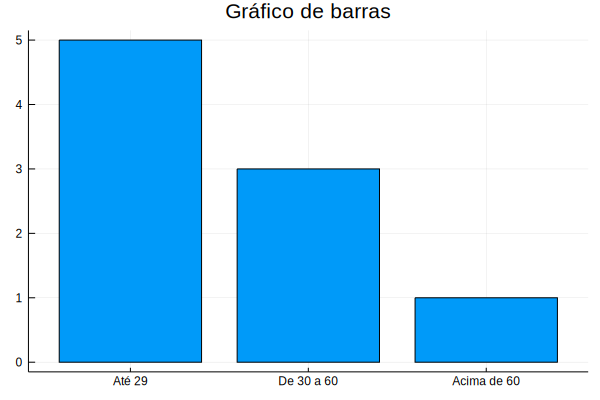

In [57]:
x = ["Até 29", "De 30 a 60", "Acima de 60"]
y = [5,3,1]
bar(x,y, legend=false)
title!("Gráfico de barras")

Podemos utilizar um histograma para obter a distribuição de frequências de uma variável contínua.

In [58]:
using Random

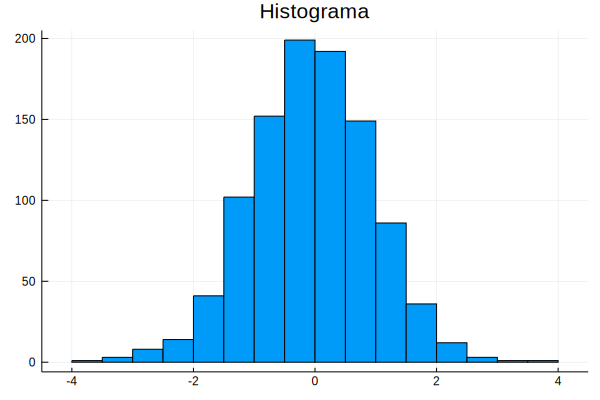

In [59]:
# Gerando 1000 números com distribuição normal
x = randn(1000)
histogram(x, legend=false)
title!("Histograma")

In [60]:
using StatsPlots

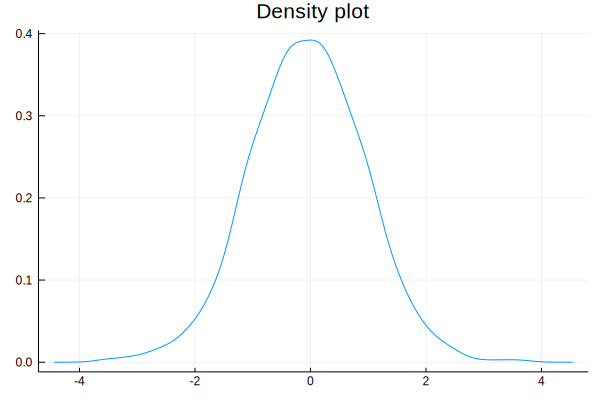

In [61]:
# Para representar o mesmo conjunto de dados como uma distribuição contínua, usamos um gráfico de densidade
density(x, legend=false)
title!("Density plot")

---
## Exercícios
Stevenson (1981, p. 51-52), exercícios suplementares 1, 2, 3, 4, 7, 8 e 10.

In [47]:
# 1) Seu código aqui!

In [48]:
# 2) Seu código aqui!

In [49]:
# 3) Seu código aqui!

In [50]:
# 4) Seu código aqui!

In [51]:
# 7) Seu código aqui!

In [52]:
# 8) Seu código aqui!

In [53]:
# 10) Seu código aqui!